In [1]:
import numpy as np,numpy
import sys
import math
import matplotlib.pyplot as plt                 #加载matplotlib用于数据的可视化
from sklearn.decomposition import PCA         #加载PCA算法包
from sklearn import preprocessing 

In [96]:
# 从text文本中读取特征点
def readPoints(path) :
    # Create an array of points.
    points = [];
    # Read points
    with open(path) as file :
        for line in file :
            x, y = line.split()
            points.append((int(x),int(y)))
    return points

#对特征点做PCA
def feature_points_PCA(path,filenum,filename):
    all_points=[]
    all_points=np.matrix(all_points)
    #取出filenum个文件中所有的特征点并存放到all_points的numpy矩阵中
    for fnum in range(filenum):
        p_path=path+filename+str(fnum+1)+'.txt'
        points=readPoints(p_path)
        points=np.array(points)
        p_num=len(points)

        #计算特征点和平均特征点的均值和标准化
        aver_cols_p = np.mean(points,axis=0)
        m_points=points[:,:]-aver_cols_p#特征点标准化
        stdn=np.std(m_points)
        s_points=m_points/stdn
        
        if(fnum==0):
            all_points=points
            s_a_points=s_points
        else:
            s_a_points=np.vstack((s_a_points,s_points))
            all_points=np.vstack((all_points,points))
    s_a_points=np.array(s_a_points)
    all_points=np.array(all_points)
    
    #计算所有脸的平均点
    aver_points=np.reshape(s_a_points,(filenum,p_num,2))
    aver_points=np.mean(aver_points,axis=0)
    
    #计算主成分并转换维度
    s_a_points=np.reshape(s_a_points,(filenum,p_num*2))#转换成596*156维度
    pca=PCA(n_components=10)     #加载PCA算法，设置主成分数目为4
    pca.fit(s_a_points)
    pca_points=np.transpose(pca.components_)
    print("explained_variance_ratio",pca.explained_variance_ratio_)
    print("components_.shape",pca.components_.shape)
    print("explained_variance",pca.explained_variance_)
    print("singular_values",pca.singular_values_)
    pc1=pca_points[:,0]
    pc2=pca_points[:,1]
    pc3=pca_points[:,2]
    pc4=pca_points[:,3]

    pc1=np.reshape(pc1,(p_num,2))
    pc2=np.reshape(pc2,(p_num,2))
    pc3=np.reshape(pc3,(p_num,2))
    pc4=np.reshape(pc4,(p_num,2))
    
    plt.figure(1)
    #输出pc1点
    plt.subplot(221)
    plt.scatter(pc1[:,0],pc1[:,1],s=5,c='G',marker='.')   
    plt.title("pca component pc1")
    
    #输出pc2点
    plt.subplot(222)
    plt.scatter(pc2[:,0],pc2[:,1],s=5,c='G',marker='.')   
    plt.title("pca component pc2")
    
    #输出pc3点
    plt.subplot(223)
    plt.scatter(pc3[:,0],pc3[:,1],s=5,c='G',marker='.')   
    plt.title("pca component pc3")
    
    #输出pc4点
    plt.subplot(224)
    plt.scatter(pc4[:,0],pc4[:,1],s=5,c='G',marker='.')   
    plt.title("pca component pc4")
    
    plt.figure(2)
    aver=aver_points
    aver1=aver_points+3*pc1*pca.explained_variance_[0]**0.5
    aver2=aver_points-3*pc1*pca.explained_variance_[0]**0.5
    plt.ylim([min(min(-aver1[:,1]),min(-aver2[:,1])),max(max(-aver1[:,1]),max(-aver2[:,1]))])
    plt.xlim([min(min(aver1[:,0]),min(aver2[:,0])),max(max(aver1[:,0]),max(aver2[:,0]))])
    
    #输出平均特征点
    plt.subplot(132)
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.')   
    plt.title("aver_points")
    #输出特征点乘以特征向量
    plt.subplot(131)
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.') 
    plt.title("aver_points+3*pc1")
    #输出特征点乘以特征向量
    plt.subplot(133)
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.') 
    plt.title("aver_points-3*pc1")
    
    plt.figure(3)
    #输出平均特征点
    plt.subplot(132)
    aver=aver_points
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.')   
    plt.title("aver_points")
    
    aver=aver_points+3*pc2*pca.explained_variance_[1]**0.5
    #输出特征点乘以特征向量
    plt.subplot(131)
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.') 
    plt.title("aver_points+3*pc2")
    
    aver=aver_points-3*pc2*pca.explained_variance_[1]**0.5
    #输出特征点乘以特征向量
    plt.subplot(133)
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.') 
    plt.title("aver_points-3*pc2")
    
    plt.figure(4)
    #输出平均特征点
    plt.subplot(132)
    aver=aver_points
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.')   
    plt.title("aver_points")
    
    aver=aver_points+3*pc3*pca.explained_variance_[2]**0.5
    #输出特征点乘以特征向量
    plt.subplot(131)
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.') 
    plt.title("aver_points+3*pc3")
    
    aver=aver_points-3*pc3*pca.explained_variance_[2]**0.5
    #输出特征点乘以特征向量
    plt.subplot(133)
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.') 
    plt.title("aver_points-3*pc3")
    
    plt.figure(5)
    #输出平均特征点
    plt.subplot(132)
    aver=aver_points
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.')   
    plt.title("aver_points")
    
    aver=aver_points+3*pc4*pca.explained_variance_[3]**0.5
    #输出特征点乘以特征向量
    plt.subplot(131)
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.') 
    plt.title("aver_points+3*pc4")
    
    aver=aver_points-3*pc4*pca.explained_variance_[3]**0.5
    #输出特征点乘以特征向量
    plt.subplot(133)
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.') 
    plt.title("aver_points-3*pc4")
    
    plt.show()
    
    #保存未归一化的pc
    aver_cols=np.mean(all_points,0)
    points=[]
    pc1=3*pc1*pca.explained_variance_[0]**0.5
    for i in range(0, len(pc1)):
        x = pc1[i,0]
        y = pc1[i,1]
        points.append((x,y))
    path="/home/fengchao/桌面/facedata/pca1.txt"
    np.savetxt(path,points,fmt='%f %f')
    points=[]
    pc2=3*pc2*pca.explained_variance_[1]**0.5
    for i in range(0, len(pc2)):
        x = pc2[i,0]
        y = pc2[i,1]
        points.append((x,y))
    path="/home/fengchao/桌面/facedata/pca2.txt"
    np.savetxt(path,points,fmt='%f %f')
    points=[]
    pc3=3*pc3*pca.explained_variance_[2]**0.5
    for i in range(0, len(pc3)):
        x = pc3[i,0]
        y = pc3[i,1]
        points.append((x,y))
    path="/home/fengchao/桌面/facedata/pca3.txt"
    np.savetxt(path,points,fmt='%f %f')
    points=[]
    pc4=3*pc4*pca.explained_variance_[3]**0.5
    for i in range(0, len(pc4)):
        x = pc4[i,0]
        y = pc4[i,1]
        points.append((x,y))
    path="/home/fengchao/桌面/facedata/pca4.txt"
    np.savetxt(path,points,fmt='%f %f')

explained_variance_ratio [0.19169356 0.15675452 0.13146159 0.08551817 0.06884549 0.06471298
 0.03844036 0.03459084 0.02351933 0.02084309]
components_.shape (10, 156)
explained_variance [0.13523531 0.11058664 0.09274307 0.06033107 0.04856888 0.04565349
 0.02711877 0.02440303 0.01659234 0.01470431]
singular_values [8.97022915 8.11166134 7.42846748 5.99140918 5.37573085 5.21189276
 4.01692292 3.81048594 3.14204407 2.95788171]


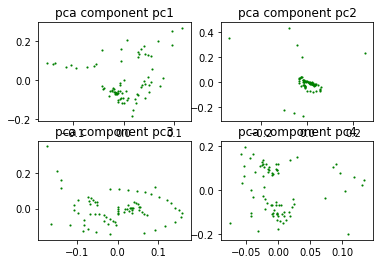

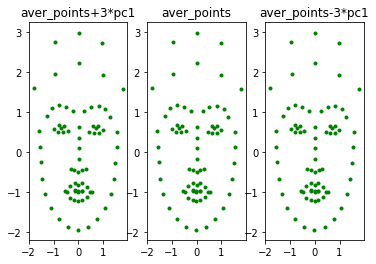

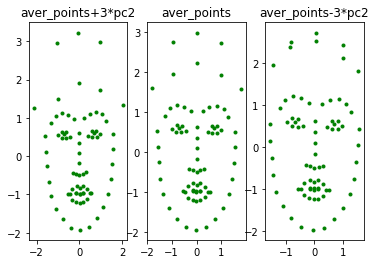

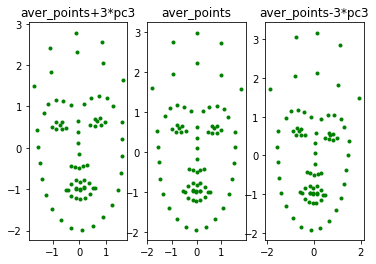

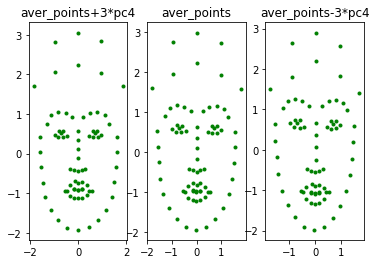

In [97]:
path="/home/fengchao/桌面/facedata/processedimg/"
filename="h"
filenum=596
feature_points_PCA(path,filenum,filename)

[0.8733209  0.06615758 0.01226597 0.00789058]
(4, 156)
[10.4824282   0.79408622  0.14722779  0.09471024]
[78.97496299 21.73663498  9.35951584  7.50683621]


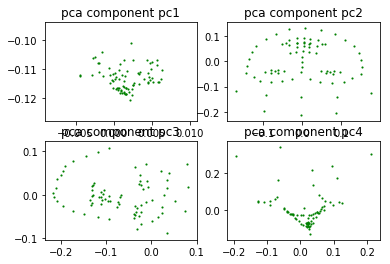

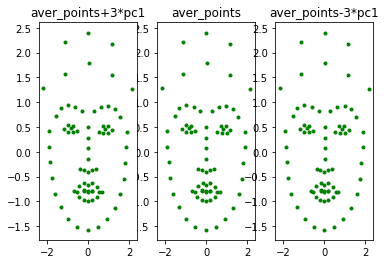

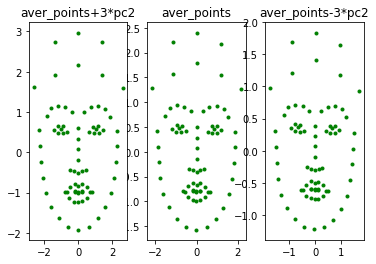

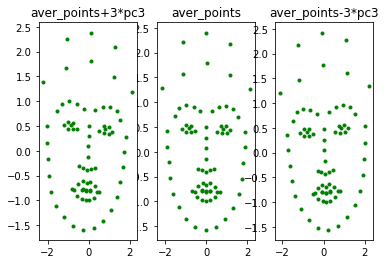

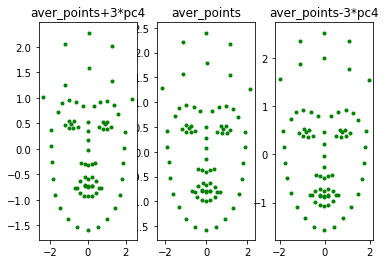

In [93]:
# 从text文本中读取特征点
def readPoints(path) :
    # Create an array of points.
    points = [];
    # Read points
    with open(path) as file :
        for line in file :
            x, y = line.split()
            points.append((int(x),int(y)))
    return points

#对特征点做PCA
def feature_points_PCA(path,filenum,filename):
    all_points=[]
    all_points=np.matrix(all_points)
    #取出filenum个文件中所有的特征点并存放到all_points的numpy矩阵中
    for fnum in range(filenum):
        p_path=path+filename+str(fnum+1)+'.txt'
        points=readPoints(p_path)
        points=np.array(points)
        p_num=len(points)       
        if(fnum==0):
            all_points=points
        else:
            all_points=np.vstack((all_points,points))
    all_points=np.array(all_points)

   
    #计算特征点和平均特征点的均值和标准化
    aver_cols_p = np.mean(all_points,axis=0)
    m_points=all_points-aver_cols_p
    stdx=np.std(m_points[:,0])
    stdy=np.std(m_points[:,1])
    std=np.array((stdx,stdy))
    s_a_points=m_points/std

    
    #计算所有脸的平均点
    aver_points=np.reshape(s_a_points,(filenum,p_num,2))
    aver_points=np.mean(aver_points,axis=0)
    
    #计算主成分并转换维度
    s_a_points=np.reshape(s_a_points,(filenum,p_num*2))#转换成596*156维度
    pca=PCA(n_components=4)     #加载PCA算法，设置主成分数目为4
    pca.fit(s_a_points)
    pca_points=np.transpose(pca.components_)
    print(pca.explained_variance_ratio_)
    print(pca.components_.shape)
    print(pca.explained_variance_)
    print(pca.singular_values_)
    pc1=pca_points[:,0]
    pc2=pca_points[:,1]
    pc3=pca_points[:,2]
    pc4=pca_points[:,3]

    pc1=np.reshape(pc1,(p_num,2))
    pc2=np.reshape(pc2,(p_num,2))
    pc3=np.reshape(pc3,(p_num,2))
    pc4=np.reshape(pc4,(p_num,2))
    
    plt.figure(1)
    #输出pc1点
    plt.subplot(221)
    plt.scatter(pc1[:,0],pc1[:,1],s=5,c='G',marker='.')   
    plt.title("pca component pc1")
    
    #输出pc2点
    plt.subplot(222)
    plt.scatter(pc2[:,0],pc2[:,1],s=5,c='G',marker='.')   
    plt.title("pca component pc2")
    
    #输出pc3点
    plt.subplot(223)
    plt.scatter(pc3[:,0],pc3[:,1],s=5,c='G',marker='.')   
    plt.title("pca component pc3")
    
    #输出pc4点
    plt.subplot(224)
    plt.scatter(pc4[:,0],pc4[:,1],s=5,c='G',marker='.')   
    plt.title("pca component pc4")
    
    plt.figure(2)
    aver=aver_points
    aver1=aver_points+3*pc1*pca.explained_variance_[0]**0.5
    aver2=aver_points-3*pc1*pca.explained_variance_[0]**0.5
    plt.ylim([min(min(-aver1[:,1]),min(-aver2[:,1])),max(max(-aver1[:,1]),max(-aver2[:,1]))])
    plt.xlim([min(min(aver1[:,0]),min(aver2[:,0])),max(max(aver1[:,0]),max(aver2[:,0]))])
    
    #输出平均特征点
    plt.subplot(132)
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.')   
    plt.title("aver_points")
    #输出特征点乘以特征向量
    plt.subplot(131)
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.') 
    plt.title("aver_points+3*pc1")
    #输出特征点乘以特征向量
    plt.subplot(133)
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.') 
    plt.title("aver_points-3*pc1")
    
    
    plt.figure(3)
    #输出平均特征点
    plt.subplot(132)
    aver=aver_points
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.')   
    plt.title("aver_points")
    
    aver=aver_points+3*pc2*pca.explained_variance_[1]**0.5
    #输出特征点乘以特征向量
    plt.subplot(131)
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.') 
    plt.title("aver_points+3*pc2")
    
    aver=aver_points-3*pc2*pca.explained_variance_[1]**0.5
    #输出特征点乘以特征向量
    plt.subplot(133)
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.') 
    plt.title("aver_points-3*pc2")
    
    
    plt.figure(4)
    #输出平均特征点
    plt.subplot(132)
    aver=aver_points
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.')   
    plt.title("aver_points")
    
    aver=aver_points+3*pc3*pca.explained_variance_[2]**0.5
    #输出特征点乘以特征向量
    plt.subplot(131)
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.') 
    plt.title("aver_points+3*pc3")
    
    aver=aver_points-3*pc3*pca.explained_variance_[2]**0.5
    #输出特征点乘以特征向量
    plt.subplot(133)
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.') 
    plt.title("aver_points-3*pc3")
    
    
    plt.figure(5)
    #输出平均特征点
    plt.subplot(132)
    aver=aver_points
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.')   
    plt.title("aver_points")
    
    aver=aver_points+3*pc4*pca.explained_variance_[3]**0.5
    #输出特征点乘以特征向量
    plt.subplot(131)
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.') 
    plt.title("aver_points+3*pc4")
    
    aver=aver_points-3*pc4*pca.explained_variance_[3]**0.5
    #输出特征点乘以特征向量
    plt.subplot(133)
    plt.scatter(aver[:,0],-aver[:,1],c='G',marker='.') 
    plt.title("aver_points-3*pc4")
    
    plt.show()
    
    
    #保存未归一化的pc
    
    points=[]
    pc1=3*pc1*pca.explained_variance_[0]**0.5
    for i in range(0, len(pc1)):
        x = pc1[i,0]
        y = pc1[i,1]
        points.append((x,y))
    path="/home/fengchao/桌面/facedata/pca1.txt"
    np.savetxt(path,points,fmt='%f %f')
    points=[]
    pc2=3*pc2*pca.explained_variance_[1]**0.5
    for i in range(0, len(pc2)):
        x = pc2[i,0]
        y = pc2[i,1]
        points.append((x,y))
    path="/home/fengchao/桌面/facedata/pca2.txt"
    np.savetxt(path,points,fmt='%f %f')
    points=[]
    pc3=3*pc3*pca.explained_variance_[2]**0.5
    for i in range(0, len(pc3)):
        x = pc3[i,0]
        y = pc3[i,1]
        points.append((x,y))
    path="/home/fengchao/桌面/facedata/pca3.txt"
    np.savetxt(path,points,fmt='%f %f')
    points=[]
    pc4=3*pc4*pca.explained_variance_[3]**0.5
    for i in range(0, len(pc4)):
        x = pc4[i,0]
        y = pc4[i,1]
        points.append((x,y))
    path="/home/fengchao/桌面/facedata/pca4.txt"
    np.savetxt(path,points,fmt='%f %f')

    
path="/home/fengchao/桌面/facedata/processedimg/"
filename="h"
filenum=596
feature_points_PCA(path,filenum,filename)